<a href="https://colab.research.google.com/github/jeibloo/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
from statistics import mean, stdev
import numpy as np
sales = [3505,2400,3027,2798,3700,3250,2689]

In [136]:
def valMean(x):
  return sum(x)/len(x)

## Here I just followed the equation exactly, so, thank god for that.
def valVar(x):
  xi = 0
  xb = mean(x)
  xAll = 0
  ## Repeat i and subtract mean, square each time. Got confused for a sec
  ## cause I thought I squared it after they were all summed up, not realizing.
  for i in x:
    ## subtracting point and mean
    xi = i - xb
    ## squaring
    xi = xi**2
    ## adding to this xAll to save
    xAll += xi
  ## Then I return that saved big boi number divided by the equation's N(length)
  return (xAll/len(x))

def valSTD(x):
  return x**(1/2)

salesM = valMean(sales)
salesV = valVar(sales)
salesSTD = valSTD(salesV)
### ahaaa statistics package almost tripped me up, had to use numpy for std
print("BORING \tMean:",mean(sales),"\n\tVar:",np.var(sales),"\n\tSTD:",np.std(sales))
print("COOL \tMean:",salesM,"\n\tVar:",salesV,"\n\tSTD:",salesSTD)

BORING 	Mean: 3052.714285714286 
	Var: 183761.06122448976 
	STD: 428.67360686714756
COOL 	Mean: 3052.714285714286 
	Var: 183761.06122448976 
	STD: 428.67360686714756


Tadaaaa, proof!

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import pandas as pd

In [188]:
salesW = [3505,2400,3027,2798,3700,3250,2689]
custsW = [127,80,105,92,120,115,93]

store = {"sales":salesW,"customers":custsW}
df = pd.DataFrame(store)
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


So it's showing the covariance between these two variables...right

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [189]:
custV = valVar(custsW)
custSTD = valSTD(custV)
print(np.var(custsW),np.std(custsW))
print(custV,custSTD)

## So correlation coefficient is r = cov(x,y)/sigmax,y
## what's sigma? oh std dev
salesW = [3505,2400,3027,2798,3700,3250,2689]
custsW = [127,80,105,92,120,115,93]
a = np.std(custsW)
b = np.std(sales)
print("STD: CUSTS",a,"|SALES",b)

249.3877551020408 15.792015549069118
249.3877551020408 15.792015549069118
STD: CUSTS 15.792015549069118 |SALES 428.67360686714756


\begin{align}
r = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}}
\end{align}

In [190]:
np.corrcoef(custsW,sales)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [194]:
df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv",index_col=0)
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [195]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [196]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

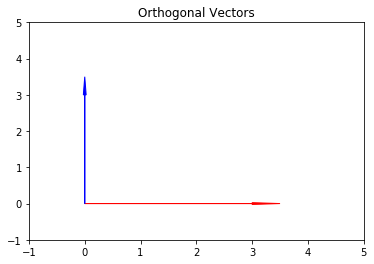

In [202]:
import matplotlib.pyplot as plt
v1 = [3,0]
v2 = [0,3]

plt.arrow(0,0, v1[0],v1[1],head_width=.05, head_length=0.5, color ='red')
plt.arrow(0,0, v2[0],v2[1],head_width=.05, head_length=0.5, color ='blue')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.title("Orthogonal Vekkies")
plt.show()

Synonym for orthogonal is perpindicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [203]:
## Let's see if dot product is zero!
a = [-5,3,7]
b = [6,-8,2]
np.dot(a,b)

-40

It is not orthogonal, the dot product ain't zero!

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [210]:
c = [2, -15, 6, 20]
## finding the square of the norm
print(np.linalg.norm(c,axis=0)**2)
print(np.matmul(c,c))
print(np.matmul(np.transpose(c),c))

665.0
665
665


They're all 665 haha

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} 
= 7 \begin{bmatrix} 1 \\ 0 \end{bmatrix} 
+ 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
= 7\hat{i}+12\hat{j} \end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
= 2 \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}
+ 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}
+ -8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
= 2\hat{i}+11\hat{j}-8\hat{k} \end{align}

qquad is space

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [213]:
### Time to divide f by its norm!
f = [4, 12, 11, 9, 2]
univekkie = f/np.linalg.norm(f)
univekkie

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

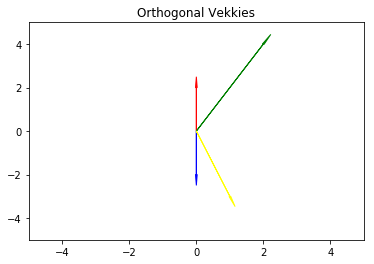

In [218]:
import matplotlib.pyplot as plt
v1 = [0,2]
v2 = [0,-2]
v3 = [2,4]
v4 = [1,-3]

plt.arrow(0,0, v1[0],v1[1],head_width=.05, head_length=0.5, color ='red')
plt.arrow(0,0, v2[0],v2[1],head_width=.05, head_length=0.5, color ='blue')
plt.arrow(0,0, v3[0],v3[1],head_width=.05, head_length=0.5, color ='green')
plt.arrow(0,0, v4[0],v4[1],head_width=.05, head_length=0.5, color ='yellow')
plt.xlim(-5,5)          
plt.ylim(-5,5)
plt.title("Orthogonal Vekkies")
plt.show()

# Span

Squish into matrix, calc rank of matrix, it'll give you size of dimensions. Rank and Span are very related.

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

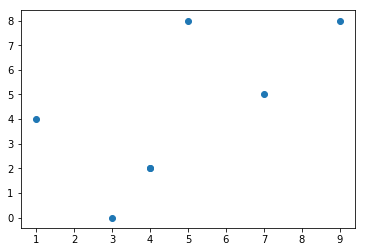

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()